# Matrices de Pauli

In [1]:
# Matrices de Pauli

I=[ 1.0 0.0; 0.0 1.0]
X=[0.0 1.0; 1.0 0.0]
Y=[0.0 -1.0im; 1.0im 0.0]
Z=[1.0 0.0; 0.0 -1.0]

2×2 Matrix{Float64}:
 1.0   0.0
 0.0  -1.0

In [2]:
sigmas=Dict(1=>X, 2=>Y, 3=>Z, 0=>I)

Dict{Int64, Matrix} with 4 entries:
  0 => [1.0 0.0; 0.0 1.0]
  2 => ComplexF64[0.0+0.0im -0.0-1.0im; 0.0+1.0im 0.0+0.0im]
  3 => [1.0 0.0; 0.0 -1.0]
  1 => [0.0 1.0; 1.0 0.0]

In [ ]:
function sigma(indice, pos, n)
    mat=sigmas[indice]
    list=[]
    for i in 1:n
        if i==pos
            push!(list, mat)
        else
            push!(list, sigmas[0])
        end

    end
    return kron(list ...)
end

sigma (generic function with 1 method)

# Condiciones generales

In [4]:
epsilon=0.5
n=4
j=1
J= j*ones(n)

4-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0

In [5]:
using LinearAlgebra

# Hamiltoniano Ising

In [6]:
function Ising(n, b,J, epsilon; cerrada=false)
    if cerrada==false
        m=n-1
       
    elseif cerrada==true
        m=n
        
    end
   

    H=-sum([J[mod(i,n+1)]*sigma(3, mod(i, n+1), n)*sigma(3,mod(i+1, n+1), n) for i in 1:m]) + b*sum([sigma(1, i, n) for i in 1:n])

    
    return H
    
end


Ising (generic function with 1 method)

In [7]:

function coordenadas(n, J, epsilon)
    lista=[]
    for b in 0:0.01:1
        H=Ising(n, b, J, epsilon)
        append!(lista, map(x-> [b, x], eigvals(H)))
    end
    return lista
end


coordenadas (generic function with 1 method)

In [8]:
x_coords=[l[1] for l in coordenadas(n, J, epsilon)]
y_coords=[l[2] for l in coordenadas(n, J, epsilon)]

1616-element Vector{Float64}:
 -3.0
 -3.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  1.0
  1.0
  ⋮
 -0.30540728933227945
  0.30540728933227745
  0.9999999999999994
  0.9999999999999998
  1.6945927106677219
  2.064177772475912
  2.7587704831436324
  4.06417777247591
  4.758770483143629

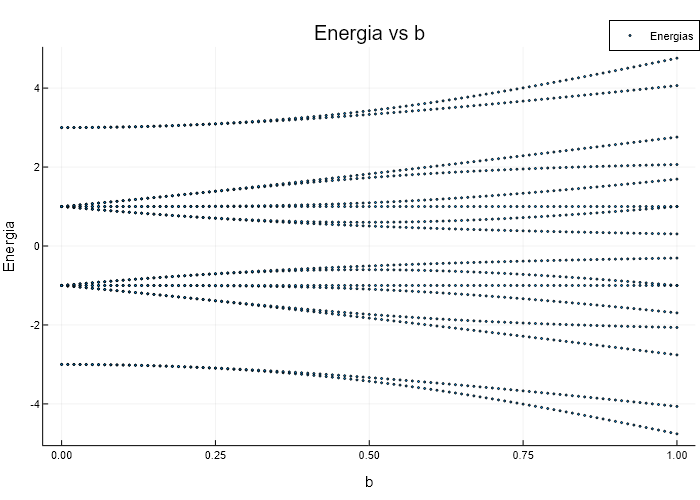

In [9]:
using Plots
plotlyjs()
scatter(x_coords , y_coords, label="Energias", xlabel="b", ylabel="Energia", title="Energia vs b", markersize=1)

#display(scatter(x_coords, y_coords, xlims=(0.5, 1), ylims=(-1,1), markersize=1))

# Sigmas_x

In [10]:
function sigmas_pauli(pos, n)
    mat=sigmas[pos]
    list=[]
    for i in 1:n
    
        push!(list, mat)
    end
    return kron(list ...)
end

sigmas_pauli (generic function with 1 method)

In [11]:
sigmas_x=sigmas_pauli(1, n)

16×16 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  

In [12]:

vals= eigvals(sigmas_x)
vecs=eigvecs(sigmas_x)

16×16 Matrix{Float64}:
  0.0        0.0        0.0        0.0       …  0.0       0.0       0.707107
  0.707107   0.0        0.0        0.0          0.0       0.0       0.0
  0.0        0.0        0.0        0.0          0.707107  0.0       0.0
  0.0        0.707107   0.0        0.0          0.0       0.0       0.0
  0.0        0.0        0.0        0.0          0.0       0.0       0.0
  0.0        0.0        0.707107   0.0       …  0.0       0.0       0.0
  0.0        0.0        0.0        0.0          0.0       0.0       0.0
  0.0        0.0        0.0        0.707107     0.0       0.707107  0.0
  0.0        0.0        0.0       -0.707107     0.0       0.707107  0.0
  0.0        0.0        0.0        0.0          0.0       0.0       0.0
  0.0        0.0       -0.707107   0.0       …  0.0       0.0       0.0
  0.0        0.0        0.0        0.0          0.0       0.0       0.0
  0.0       -0.707107   0.0        0.0          0.0       0.0       0.0
  0.0        0.0        0.0        0

# Final Vals

In [13]:
function final_vals(vals, digits)
    rounded_vals = round.(vals,digits=5)
    final_vals = []
    for (val, round_val) in zip(vals, rounded_vals)
        if norm(round_val - val) < 1e-3
            push!(final_vals, round_val)
        else
            push!(final_vals, val)
        end
    end
    
    final_vals_unique=unique(final_vals)
    return  final_vals, final_vals_unique
     
    
end

final_vals (generic function with 1 method)

In [14]:
f_vals, f_vals_unique=final_vals(vals, 5)

(Any[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Any[-1.0, 1.0])

In [15]:
f_vals_unique

2-element Vector{Any}:
 -1.0
  1.0

In [16]:
function multiplicidad(vals, vals_unique)
    dict=Dict()
    for i in 1:length(vals_unique)
    dict[i]=length(findall(vals .== vals_unique[i]))
    end
    return dict
end

multiplicidad (generic function with 1 method)

# Hamiltoniano_paridad

In [17]:
function Hamiltoniano_paridad(n, b, J, epsilon, vecs, final_vals, final_vals_unique, j)
    H=Ising(n, b, J, epsilon)
    dic=multiplicidad(final_vals, final_vals_unique)
    P=vecs[:, final_vals.== final_vals_unique[j]]
    Hp=zeros(Complex{Float64},dic[j], dic[j])
    
    for i in 1:dic[j]
        for k in 1:dic[j]
            Hp[i, k]=P[:, i]'*H*P[:, k]
        end
    end
    

    return real(Hp)
end

Hamiltoniano_paridad (generic function with 1 method)

In [21]:
function coordenadas1(n, J, epsilon, vecs, final_vals, final_vals_unique, j)
    lista=[]
    for b in 0:0.01:2
        H=Hamiltoniano_paridad(n, b, J, epsilon, vecs, final_vals, final_vals_unique, j)
        append!(lista, map(x-> [b, x], eigvals(H)))
    end
    return lista
end


coordenadas1 (generic function with 1 method)

In [32]:
x_coords1=[l[1] for l in coordenadas1(n, J, epsilon, vecs, f_vals, f_vals_unique, 1)]
y_coords1=[l[2] for l in coordenadas1(n, J, epsilon, vecs, f_vals, f_vals_unique, 1)]

1608-element Vector{Float64}:
 -3.0
 -1.0
 -1.0
 -1.0
  1.0
  1.0
  1.0
  3.0
 -3.000149991251037
 -1.0142163678401188
  ⋮
  5.846965951492356
 -5.8658445062541436
 -4.702423543229194
 -3.510954130596215
 -2.674375093621165
  2.674375093621163
  3.510954130596212
  4.7024235432291945
  5.865844506254145

In [35]:
x_coords2=[l[1] for l in coordenadas1(n, J, epsilon, vecs, f_vals, f_vals_unique, 2)]
y_coords2=[l[2] for l in coordenadas1(n, J, epsilon, vecs, f_vals, f_vals_unique, 2)]

1608-element Vector{Float64}:
 -3.0
 -1.0
 -1.0
 -1.0
  1.0
  1.0
  1.0
  3.0
 -3.000150011249039
 -1.014216347842118
  ⋮
  8.338708430228353
 -8.376798636850364
 -2.19146941263298
 -1.0000000000000004
 -0.16342096302495107
  0.1634209630249516
  1.0
  2.1914694126329803
  8.376798636850364

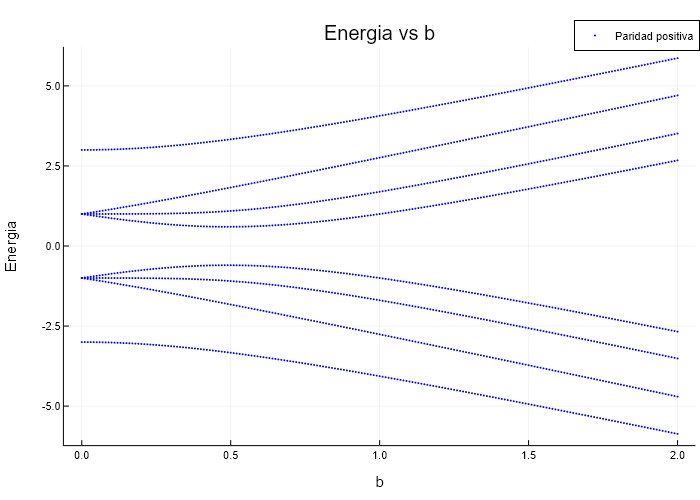

In [36]:
using Plots
scatter(x_coords1 , y_coords1, label="Paridad positiva", xlabel="b", ylabel="Energia", title="Energia vs b", markersize=1, markercolor=:blue, markerstrokewidth=0)


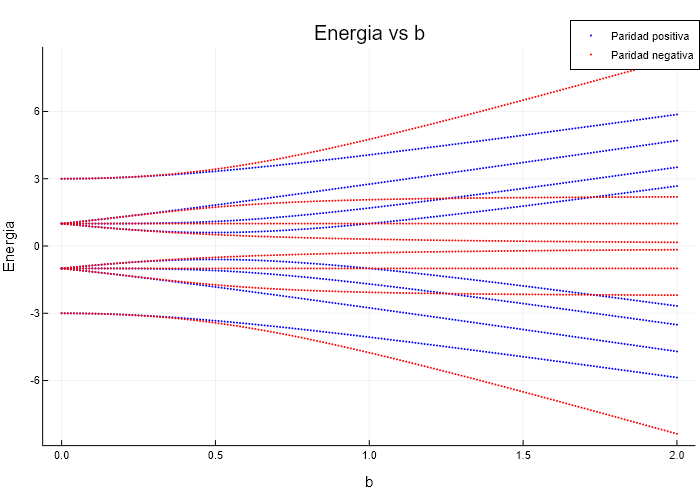

In [37]:
scatter!(x_coords2 , y_coords2, label="Paridad negativa", xlabel="b", ylabel="Energia", title="Energia vs b", markersize=1, markercolor=:red, markerstrokewidth=0)

In [38]:

function base_2(integer; pad= nothing)
    if pad == nothing
        return reverse(digits(integer, base = 2))
    else
        return reverse(digits(integer, base = 2, pad = pad))
    end
end

base_2 (generic function with 1 method)

In [39]:
function rotate(index, pad)
    vec=base_2(index, pad= pad)
    return [vec[end]; vec[1: end-1]]
end

rotate (generic function with 1 method)

In [40]:
function original_integer(list)
    return parse(Int, join(list); base=2) +1
end

original_integer (generic function with 1 method)

In [41]:
function K(pad)
    K= zeros(2^pad, 2^pad)
    for i in 1:2^pad
        K[ original_integer(rotate(i-1, pad)), i]=1
    end
    return K
end

K (generic function with 1 method)

In [42]:
K_operator=K(n)

16×16 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [43]:
eig_vals=eigvals(K_operator)

16-element Vector{ComplexF64}:
   -1.0000000000000004 + 0.0im
   -1.0000000000000004 + 0.0im
   -1.0000000000000004 + 0.0im
                  -1.0 + 0.0im
 8.326672684688674e-17 - 0.9999999999999996im
 8.326672684688674e-17 - 0.9999999999999996im
 8.326672684688674e-17 - 0.9999999999999996im
 8.326672684688674e-17 + 0.9999999999999996im
 8.326672684688674e-17 + 0.9999999999999996im
 8.326672684688674e-17 + 0.9999999999999996im
    0.9999999999999999 + 0.0im
    0.9999999999999999 + 0.0im
    0.9999999999999999 + 0.0im
                   1.0 + 0.0im
                   1.0 + 0.0im
                   1.0 + 0.0im

In [44]:
eig_vecs=eigvecs(K_operator)

16×16 Matrix{ComplexF64}:
  0.0+0.0im   0.0+0.0im   0.0+0.0im        0.0+0.0im  …  1.0+0.0im  0.0+0.0im
  0.0+0.0im   0.5+0.0im   0.0+0.0im        0.0+0.0im     0.0+0.0im  0.0+0.0im
  0.0+0.0im  -0.5+0.0im   0.0+0.0im        0.0+0.0im     0.0+0.0im  0.0+0.0im
  0.0+0.0im   0.0+0.0im  -0.5+0.0im        0.0+0.0im     0.0+0.0im  0.0+0.0im
  0.0+0.0im   0.5+0.0im   0.0+0.0im        0.0+0.0im     0.0+0.0im  0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im  -0.707107+0.0im  …  0.0+0.0im  0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.5+0.0im        0.0+0.0im     0.0+0.0im  0.0+0.0im
 -0.5+0.0im   0.0+0.0im   0.0+0.0im        0.0+0.0im     0.0+0.0im  0.0+0.0im
  0.0+0.0im  -0.5+0.0im   0.0+0.0im        0.0+0.0im     0.0+0.0im  0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.5+0.0im        0.0+0.0im     0.0+0.0im  0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im   0.707107+0.0im  …  0.0+0.0im  0.0+0.0im
  0.5+0.0im   0.0+0.0im   0.0+0.0im        0.0+0.0im     0.0+0.0im  0.0+0.0im
  0.0+0.0im   0.0+0.0im  -0.5+0.0im   

In [45]:
vals_f, unique_vals_f=final_vals(eig_vals, 5)

(Any[-1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, 0.0 - 1.0im, 0.0 - 1.0im, 0.0 - 1.0im, 0.0 + 1.0im, 0.0 + 1.0im, 0.0 + 1.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im], Any[-1.0 + 0.0im, 0.0 - 1.0im, 0.0 + 1.0im, 1.0 + 0.0im])

In [46]:
x_coords1=[l[1] for l in coordenadas1(n, J, epsilon, eig_vecs, vals_f, unique_vals_f, 1)]
y_coords1=[l[2] for l in coordenadas1(n, J, epsilon, eig_vecs, vals_f, unique_vals_f, 1)]

804-element Vector{Float64}:
 -8.881784197001252e-16
  0.0
  8.881784197001252e-16
  2.9999999999999996
 -0.00013332740793409965
 -4.816116012902433e-19
 -6.2592723192585165e-34
  3.000133327407934
 -0.0005332385522154841
 -1.1406020539321763e-18
  ⋮
  5.734571997262534
 -2.7532810864084696
 -9.244463733058732e-33
  2.8975680159925087e-17
  5.753281086408471
 -2.772001872658765
  1.232595164407831e-32
  1.7713934140864153e-16
  5.772001872658763

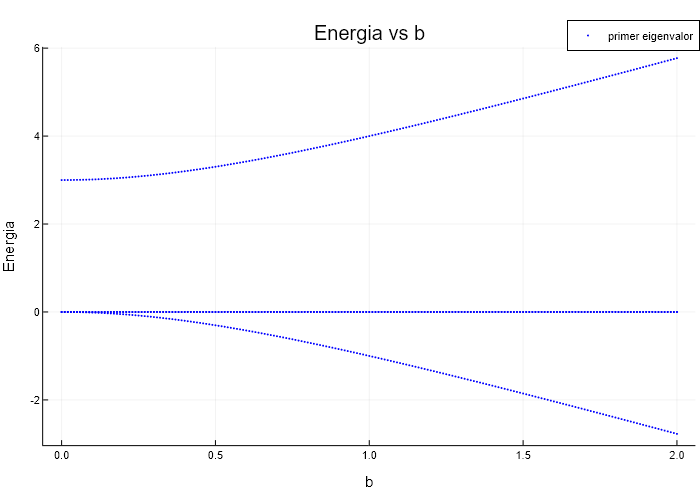

In [47]:
using Plots
scatter(x_coords1 , y_coords1, label="primer eigenvalor", xlabel="b", ylabel="Energia", title="Energia vs b", markersize=1, markercolor=:blue, markerstrokewidth=0)

In [48]:
x_coords2=[l[1] for l in coordenadas1(n, J, epsilon, eig_vecs, vals_f, unique_vals_f, 2)]
y_coords2=[l[2] for l in coordenadas1(n, J, epsilon, eig_vecs, vals_f, unique_vals_f, 2)]

603-element Vector{Float64}:
 -8.881784197001252e-16
 -1.1102230246251573e-16
  1.1102230246251573e-16
 -0.014142135623731403
 -2.465190328815662e-32
  0.014142135623730515
 -0.028284271247462363
 -2.465190328815662e-32
  0.028284271247461475
 -0.042426406871193326
  ⋮
 -2.8001428534987305
  2.465190328815662e-32
  2.8001428534987296
 -2.8142849891224615
  8.348356728138384e-17
  2.8142849891224606
 -2.8284271247461925
 -2.465190328815662e-32
  2.8284271247461916

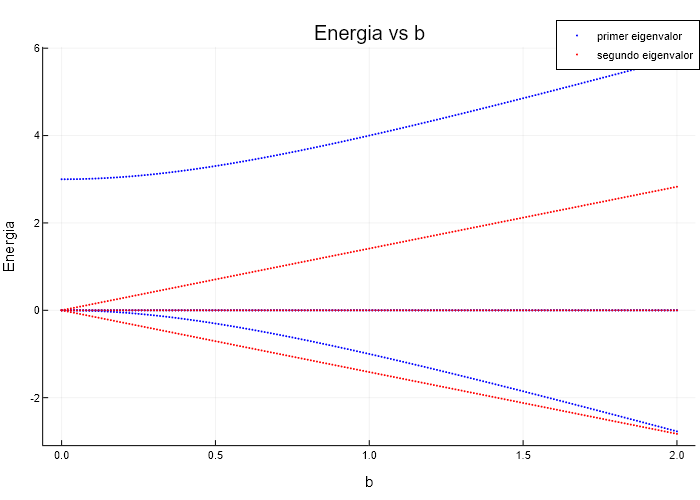

In [49]:
scatter!(x_coords2 , y_coords2, label="segundo eigenvalor", xlabel="b", ylabel="Energia", title="Energia vs b", markersize=1, markercolor=:red, markerstrokewidth=0)

In [50]:
x_coords3=[l[1] for l in coordenadas1(n, J, epsilon, eig_vecs, vals_f, unique_vals_f, 3)]
y_coords3=[l[2] for l in coordenadas1(n, J, epsilon, eig_vecs, vals_f, unique_vals_f, 3)]

603-element Vector{Float64}:
 -8.881784197001252e-16
 -1.1102230246251573e-16
  1.1102230246251573e-16
 -0.014142135623731403
 -2.465190328815662e-32
  0.014142135623730515
 -0.028284271247462363
 -2.465190328815662e-32
  0.028284271247461475
 -0.042426406871193326
  ⋮
 -2.8001428534987305
  2.465190328815662e-32
  2.8001428534987296
 -2.8142849891224615
  8.348356728138384e-17
  2.8142849891224606
 -2.8284271247461925
 -2.465190328815662e-32
  2.8284271247461916

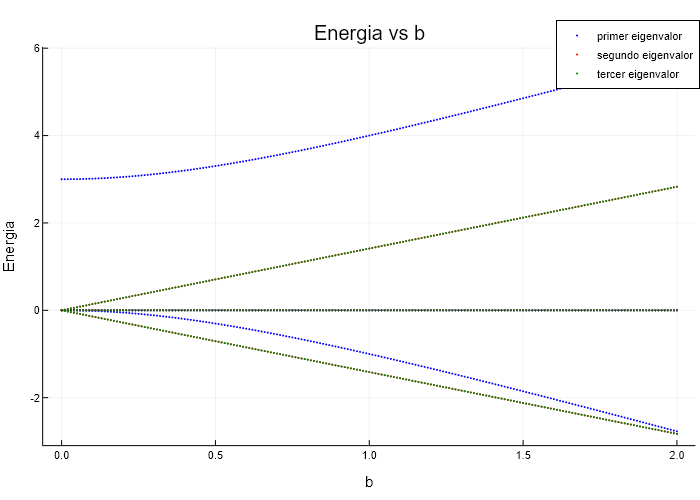

In [51]:
scatter!(x_coords3 , y_coords3, label="tercer eigenvalor", xlabel="b", ylabel="Energia", title="Energia vs b", markersize=1, markercolor=:green, markerstrokewidth=0)

In [52]:
x_coords4=[l[1] for l in coordenadas1(n, J, epsilon, eig_vecs, vals_f, unique_vals_f, 4)]
y_coords4=[l[2] for l in coordenadas1(n, J, epsilon, eig_vecs, vals_f, unique_vals_f, 4)]

1206-element Vector{Float64}:
 -3.0
 -3.0
 -3.3306690738754696e-16
  3.3306690738754696e-16
  3.3306690738754696e-16
  2.9999999999999996
 -3.000133342221827
 -3.0001333274079345
 -0.028283014140813897
  0.00013332740793372869
  ⋮
  2.0449943184679387
  2.7532810864084696
  8.25709381304547
 -8.295472094107303
 -5.772001872658761
 -2.0457621405938076
  2.0457621405938053
  2.7720018726587643
  8.29547209410731

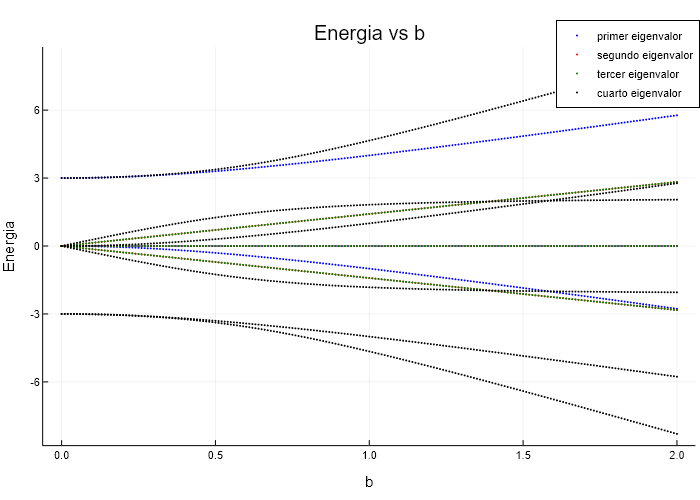

In [53]:
scatter!(x_coords4 , y_coords4, label="cuarto eigenvalor", xlabel="b", ylabel="Energia", title="Energia vs b", markersize=1, markercolor=:black, markerstrokewidth=0)